In [1]:
using DifferentialEquations
using PyCall
# pygui(:qt)
using PyPlot
# pygui(true)
using BSON: @save, @load
include("leap_frog_definitions.jl")
include("PSS_Definitions_Dimer_X.jl")
@load "0_120000000000000.bson" SAVE_DATA

# Exploring the walkabouts for H=.12
## Author
Brandon Behring

## This tutorial
In this tutorial we will work explore the braiding, walkabouts and leapfrogging in a new coordinate system. The Aref-Eckhardt coordinates are great for neighborhoods of the leapfrogging orbits, but they do little to understand braiding and walkabouts.

## Features of the new coordinates
* The new "dimer" coordinates resolve twp different time scales
* can naturally see the three stable fixed points representing the limit when dimers 'merge'
* two unstable fixed points, left-over from instabilities of the three-vortex problem?
* the braiding and walkabouts are now clearly separated
* the walkabouts stop existing around h=.2, perhaps now the leapfrogging orbits and now escape the stochastic region?


## The 'Dimer' Hamiltonian
Consider four vortices with $\Gamma_1=\Gamma_2=1$ and $\Gamma_3=\Gamma_4=-1$  located at $\pmb{r}_i=(x_i,y_i)$, the Hamiltonian can be written down explicitly as
\begin{equation}
\label{Ham}
   \begin{split}
\mathcal{H}&=-\frac{1}{4\pi} \log |\pmb{r}_4-\pmb{r}_3 |^2-\frac{1}{4\pi} \log |\pmb{r}_1-\pmb{r}_2 |^2+\frac{1}{4\pi} \log |\pmb{r}_1-\pmb{r}_3 |^2\\
&+\frac{1}{4\pi} \log |\pmb{r}_2-\pmb{r}_3 |^2+\frac{1}{4\pi} \log |\pmb{r}_1-\pmb{r}_4 |^2+\frac{1}{4\pi} \log |\pmb{r}_2-\pmb{r}_4 |^2.
\end{split}
\end{equation}


We wish to `dimerize' the two liked signed vortices. Switching to the center of vorticity of 1 and 2 of the positive vortices and 3 and 4  of the negative vortices 
\begin{equation}
\label{center}
\begin{aligned} 
\pmb{R}_{+}&=\frac{ \pmb{r}_1+\pmb{r}_2}{2}=(X_{+},Y_{+}),\\
\pmb{r}_{+}&=\pmb{r}_1-\pmb{r}_2=(x_{+},y_{+}).\\
\pmb{R}_{-}&=\frac{ \pmb{r}_3+\pmb{r}_4}{2}=(X_{-},Y_{-})\\
\pmb{r}_{-}&=\pmb{r}_3-\pmb{r}_4=(x_{-},y_{-}).
\end{aligned}
\end{equation} 

We can make a new canonical system by taking
\begin{equation}
\begin{aligned}
q_1&= \frac{1}{\sqrt{2}}\left(x_1-x_2\right), &
q_2&=+\frac{1}{\sqrt{2}}\left(x_3-x_4\right),\\
p_1&=\frac{1}{\sqrt{2}} \left(y_1-y_2\right), &
p_2&=-\frac{1}{\sqrt{2}}\left(y_3-y_4\right),
\end{aligned}
\label{dimer variables}
\end{equation}

With this choice, the Poisson brackets are now normalized, i.e.  $\{q_i,p_j\}=\delta_{ij}$. This makes keep track of our canonical transformations simpler and allows us to define our ODEs just by the Hamiltonian.

The initial coordinates for the leap frogging motion would be $q_1=q_2=0$ and $p_1=p_2$.

## The 'Aref-Eckhardt' Hamiltonian

The for of the dimer Hamiltonian suggest we look at the following transformation
\begin{equation}
\begin{aligned}
Q_1&=\frac{1}{\sqrt{2}} \left(q_1+q_2\right), &
Q_2&=\frac{1}{\sqrt{2}} \left(q_1-q_2\right),\\
P_1&=\frac{1}{\sqrt{2}} \left(p_1+p_2\right), &
P_2&=\frac{1}{\sqrt{2}} \left(p_1-p_2\right),
\end{aligned}
\label{aref_variables}
\end{equation}

which leads to Hamiltonian
 \begin{equation}
\begin{split}
\label{Aref_Hamiltonian}
4\pi H(Q_1,Q_2,P_1,P_2)&=
\log \left((Q_1+Q_2)^2+(P_1+P_2)^2\right)
+\log \left((Q_1-Q_2)^2+(P_1-P_2)^2\right)\\
&-\log \left(Q_1^2+(P_2-1)^2\right)
-\log\left(Q_1^2+(P_2+1)^2\right)\\
&-\log \left(Q_2^2+(P_1-1)^2\right)
-\log \left(Q_2^2+(P_1+1)^2\right).\\
\end{split}
\end{equation}

We often dealt with $\mathcal{H}=8 e^{-2\pi}$ given by
\begin{equation}
\label{Brandon_Aref_Hamiltonian}
\mathcal{H}(Q_1,Q_2,P_1,P_2)=\frac{1}{2} \sqrt{ \frac{\left((Q_1+Q_2)^2+(P_1+P_2)^2\right)\left((Q_1-Q_2)^2+(P_1-P_2)^2\right)}
{\left(Q_1^2+(P_2-1)^2\right)\left(Q_1^2+(P_2+1)^2\right)\left(Q_2^2+(P_1-1)^2\right) \left(Q_2^2+(P_1+1)^2\right)}}
\end{equation}

# BRAIDING

We first examine coordinates that will lead us to braiding motion. We will define our coordinates in the dimer system.

In [2]:
H=.12
max_time=100
h=1/(2*H)
max_time=100
a=(2+h-2*sqrt(h+1))/h


q20_braid=1
p20_braid=0
q2=q20_braid
p2=p20_braid
q1=0
p1=P1_find_dimer(q20_braid,p20_braid,H)
if isempty(p1)
    p1=P1_find_dimer_second(q20_braid,p20_braid,H)
end

Q1=(q1+q2)/sqrt(2)
Q2=(q1-q2)/sqrt(2)
P1=(p1[1]+p2)/sqrt(2)
P2=(p1[1]-p2)/sqrt(2);

u0=[Q1;P2;Q2;P1;0;0] # X P Q Y
Q0=[Q1,Q2]; P0=[P1,P2];
tspan = (0.0,max_time);

We now solve the ODE.

In [3]:
prob = ODEProblem(Eq_of_M_LAB_FRAME,u0,tspan)
t,A=solve(prob, RK4(),reltol=1e-6,abstol=1e-8,maxiters=1e15);
N=length(t.t)
Q1=A[1,:]
Q2=A[3,:]
P1=A[4,:]
P2=A[2,:]

q1=(Q1+Q2)/sqrt(2)
q2=(Q1-Q2)/sqrt(2)
p1=(P1+P2)/sqrt(2)
p2=(P1-P2)/sqrt(2);

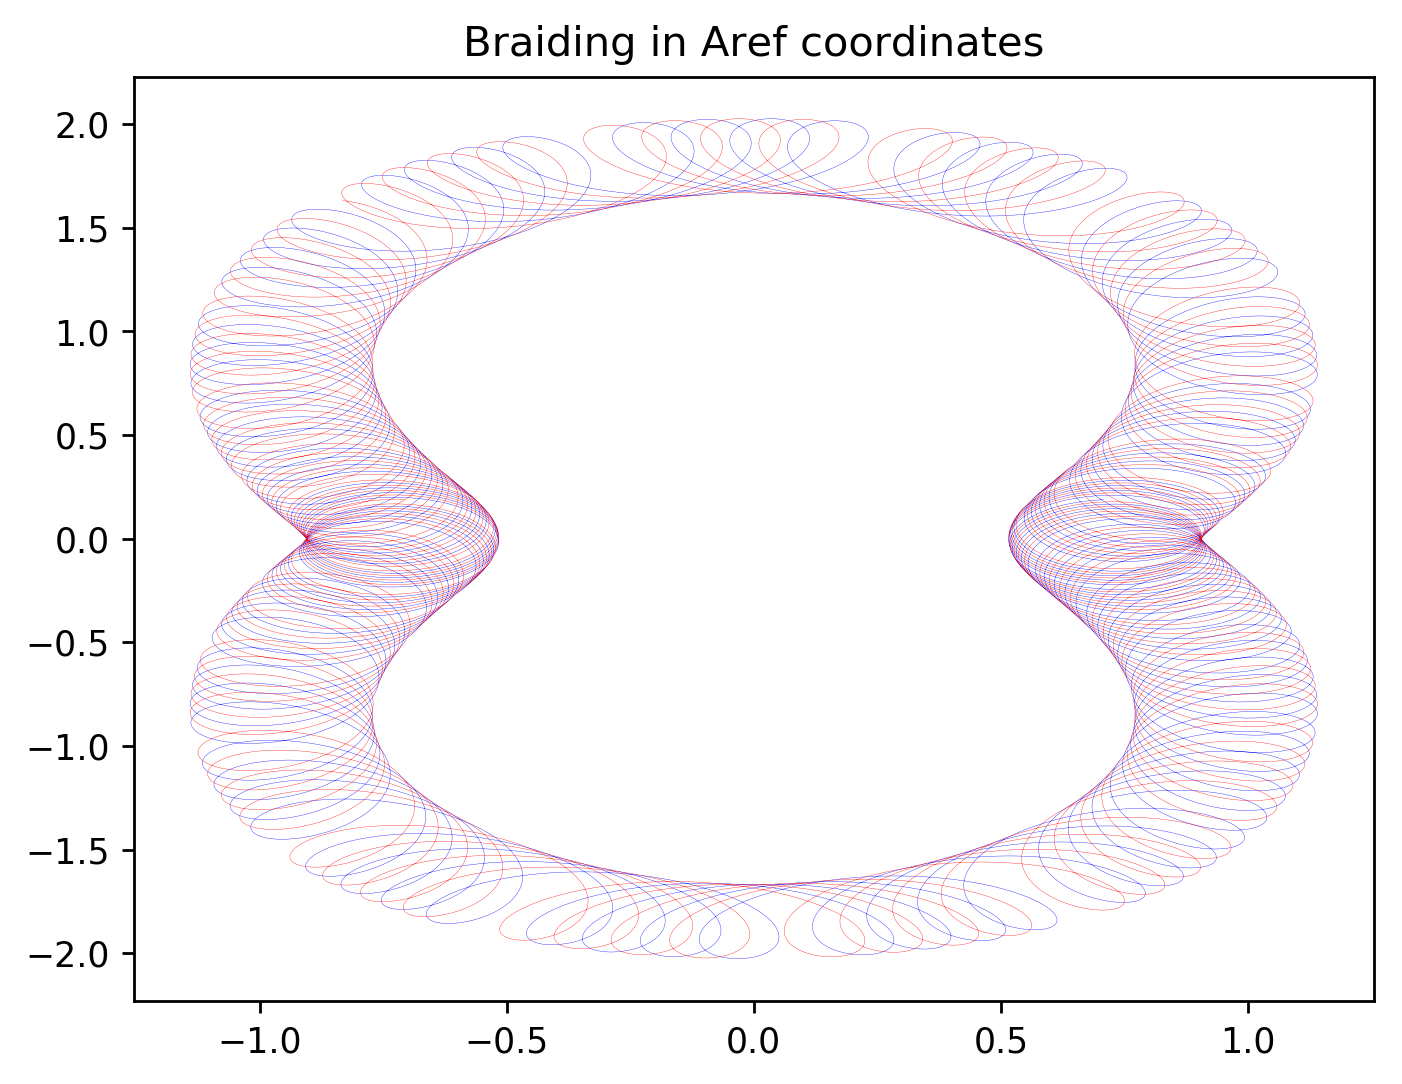

In [4]:
figure(dpi=250)
plot(Q1,P1,"b",linewidth=.1)
plot(Q2,P2,"r",linewidth=.1)
title("Braiding in Aref coordinates");

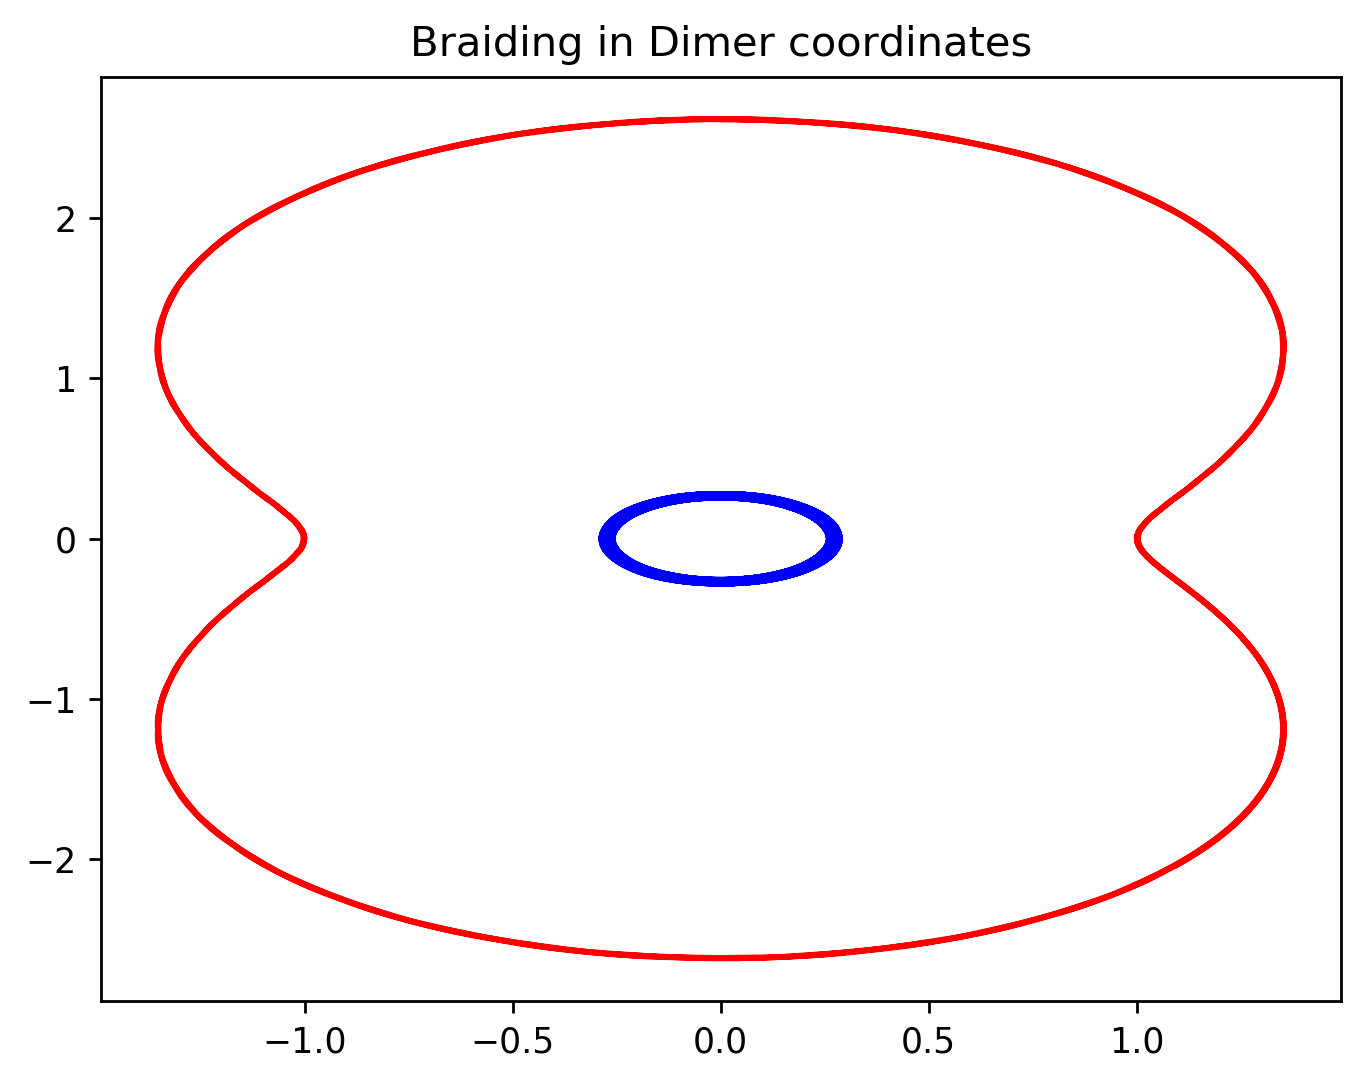

In [5]:
figure(dpi=250)
plot(q1,p1,"b")
plot(q2,p2,"r")
title("Braiding in Dimer coordinates");

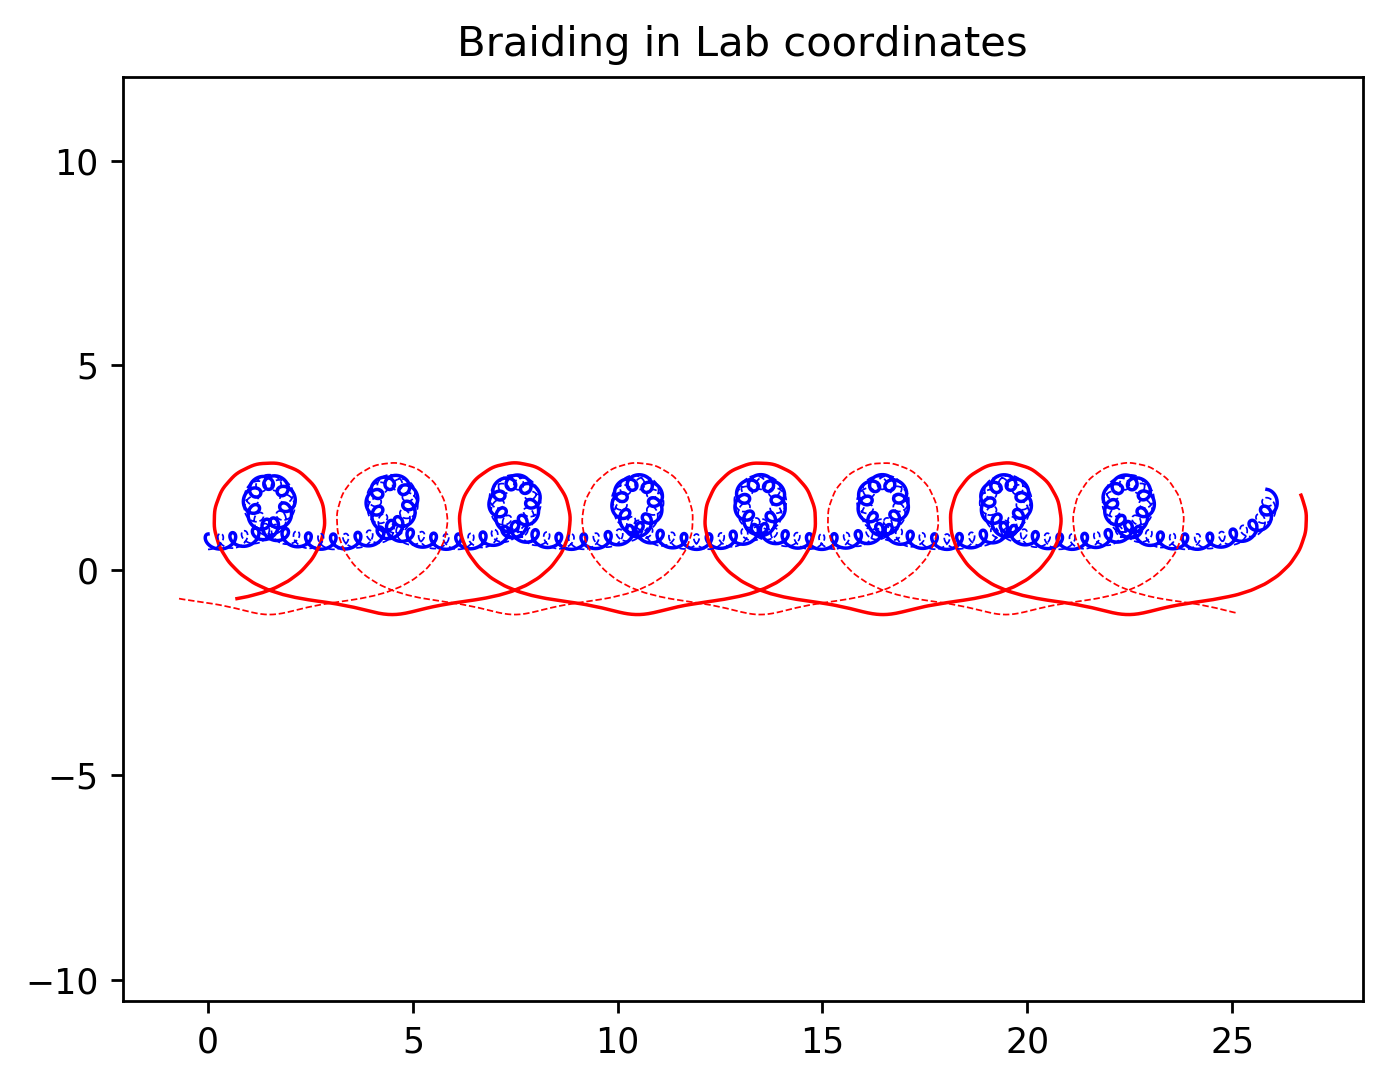

In [6]:
Centeroid=A[5,:]+im *A[6,:];
Z=A[1,:]+im *A[2,:];
W=A[3,:]+im *A[4,:];
lin_impulse=im*(1+a )*ones(N);
z_1pos=.5*(Centeroid+Z+lin_impulse+W);
z_1neg=.5*(Centeroid+Z-lin_impulse-W);
z_2pos=.5*(Centeroid-Z+lin_impulse-W);
z_2neg=.5*(Centeroid-Z-lin_impulse+W);

z_1posX=real(z_1pos)
z_1posY=imag(z_1pos)

z_2posX=real(z_2pos)
z_2posY=imag(z_2pos)

z_1negX=real(z_1neg)
z_1negY=imag(z_1neg)

z_2negX=real(z_2neg)
z_2negY=imag(z_2neg)

figure(dpi=250)
plot(z_1posX,z_1posY,c="b",linewidth=1)
plot(z_1negX,z_1negY,c="r",linewidth=1)
plot(z_2posX,z_2posY,c="b",linewidth=.5,linestyle="--")
plot(z_2negX,z_2negY,c="r",linewidth=.5,linestyle="--")
ylim(-3.2,3.2)
axis("equal")
title("Braiding in Lab coordinates");
show()

# Leapfrogging

In [7]:
H=.12
max_time=10
h=1/(2*H)
a=(2+h-2*sqrt(h+1))/h
tspan = (0.0,max_time)
Yfind(h)=sqrt(h/(2h+1));
P=Yfind(H)

q20_leap=0
p20_leap=P
q2=q20_leap
p2=p20_leap
q1=0
p1=P1_find_dimer(q20_leap,p20_leap,H)
if isempty(p1)
    p1=P1_find_dimer_second(q20_leap,p20_leap,H)
end

Q1=(q1+q2)/sqrt(2)
Q2=(q1-q2)/sqrt(2)
P1=(p1[1]+p2)/sqrt(2)
P2=(p1[1]-p2)/sqrt(2);

u0=[Q1;P2;Q2;P1;0;0] # X P Q Y
Q0=[Q1,Q2]; P0=[P1,P2];
tspan = (0.0,max_time);
    prob = ODEProblem(Eq_of_M_LAB_FRAME,u0,tspan)
t,A=solve(prob, RK4(),reltol=1e-6,abstol=1e-8,maxiters=1e15);
N=length(t.t)
Q1=A[1,:]
Q2=A[3,:]
P1=A[4,:]
P2=A[2,:]

q1=(Q1+Q2)/sqrt(2)
q2=(Q1-Q2)/sqrt(2)
p1=(P1+P2)/sqrt(2)
p2=(P1-P2)/sqrt(2)
    
Centeroid=A[5,:]+im *A[6,:];
Z=A[1,:]+im *A[2,:];
W=A[3,:]+im *A[4,:];
lin_impulse=im*(1+a )*ones(N);
z_1pos=.5*(Centeroid+Z+lin_impulse+W);
z_1neg=.5*(Centeroid+Z-lin_impulse-W);
z_2pos=.5*(Centeroid-Z+lin_impulse-W);
z_2neg=.5*(Centeroid-Z-lin_impulse+W);

z_1posX=real(z_1pos)
z_1posY=imag(z_1pos)

z_2posX=real(z_2pos)
z_2posY=imag(z_2pos)

z_1negX=real(z_1neg)
z_1negY=imag(z_1neg)

z_2negX=real(z_2neg)
z_2negY=imag(z_2neg);

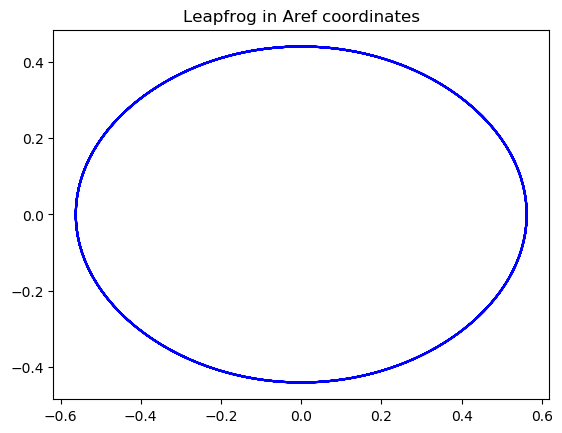

In [8]:
plot(Q1,P1,"b")
plot(Q2,P2,"r")
title("Leapfrog in Aref coordinates");

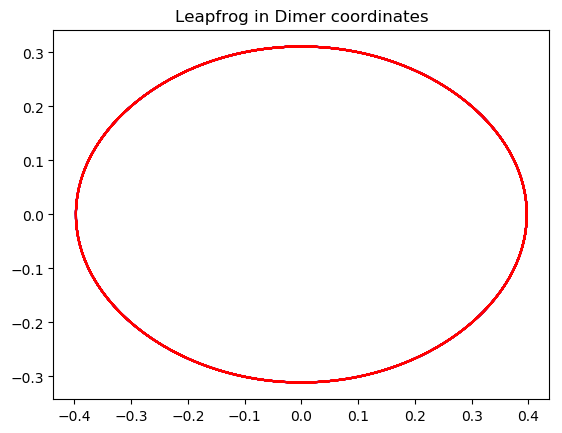

In [9]:
plot(q1,p1,"b")
plot(q2,p2,"r")
title("Leapfrog in Dimer coordinates");

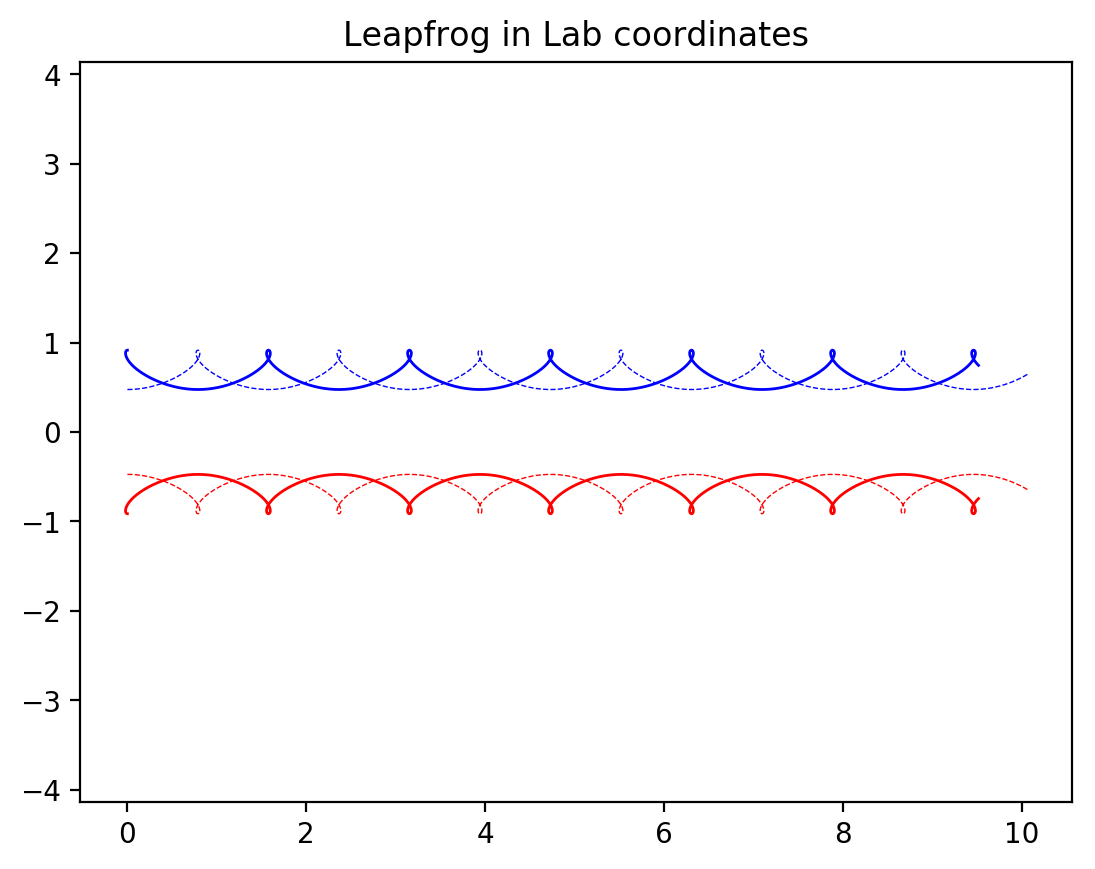

In [10]:
figure(dpi=200)
plot(z_1posX,z_1posY,c="b",linewidth=1)
plot(z_1negX,z_1negY,c="r",linewidth=1)
plot(z_2posX,z_2posY,c="b",linewidth=.5,linestyle="--")
plot(z_2negX,z_2negY,c="r",linewidth=.5,linestyle="--")
axis("equal")
title("Leapfrog in Lab coordinates");

# WALKABOUT

In [11]:
H=.12
max_time=60
h=1/(2*H)
a=(2+h-2*sqrt(h+1))/h
tspan = (0.0,max_time)


q20_walk=0
p20_walk=.5
q2=q20_walk
p2=p20_walk
q1=0
p1=P1_find_dimer(q20_walk,p20_walk,H)
if isempty(p1)
    p1=P1_find_dimer_second(q20_walk,p20_walk,H)
end

Q1=(q1+q2)/sqrt(2)
Q2=(q1-q2)/sqrt(2)
P1=(p1[1]+p2)/sqrt(2)
P2=(p1[1]-p2)/sqrt(2);

u0=[Q1;P2;Q2;P1;0;0] # X P Q Y
Q0=[Q1,Q2]; P0=[P1,P2];
tspan = (0.0,max_time);
prob = ODEProblem(Eq_of_M_LAB_FRAME,u0,tspan)
t,A=solve(prob, Vern9(),reltol=1e-13,abstol=1e-15,maxiters=1e15);
N=length(t.t)
Q1=A[1,:]
Q2=A[3,:]
P1=A[4,:]
P2=A[2,:]

q1=(Q1+Q2)/sqrt(2)
q2=(Q1-Q2)/sqrt(2)
p1=(P1+P2)/sqrt(2)
p2=(P1-P2)/sqrt(2)
    
Centeroid=A[5,:]+im *A[6,:];
Z=A[1,:]+im *A[2,:];
W=A[3,:]+im *A[4,:];
lin_impulse=im*(1+a )*ones(N);
z_1pos=.5*(Centeroid+Z+lin_impulse+W);
z_1neg=.5*(Centeroid+Z-lin_impulse-W);
z_2pos=.5*(Centeroid-Z+lin_impulse-W);
z_2neg=.5*(Centeroid-Z-lin_impulse+W);

z_1posX=real(z_1pos)
z_1posY=imag(z_1pos)

z_2posX=real(z_2pos)
z_2posY=imag(z_2pos)

z_1negX=real(z_1neg)
z_1negY=imag(z_1neg)

z_2negX=real(z_2neg)
z_2negY=imag(z_2neg);

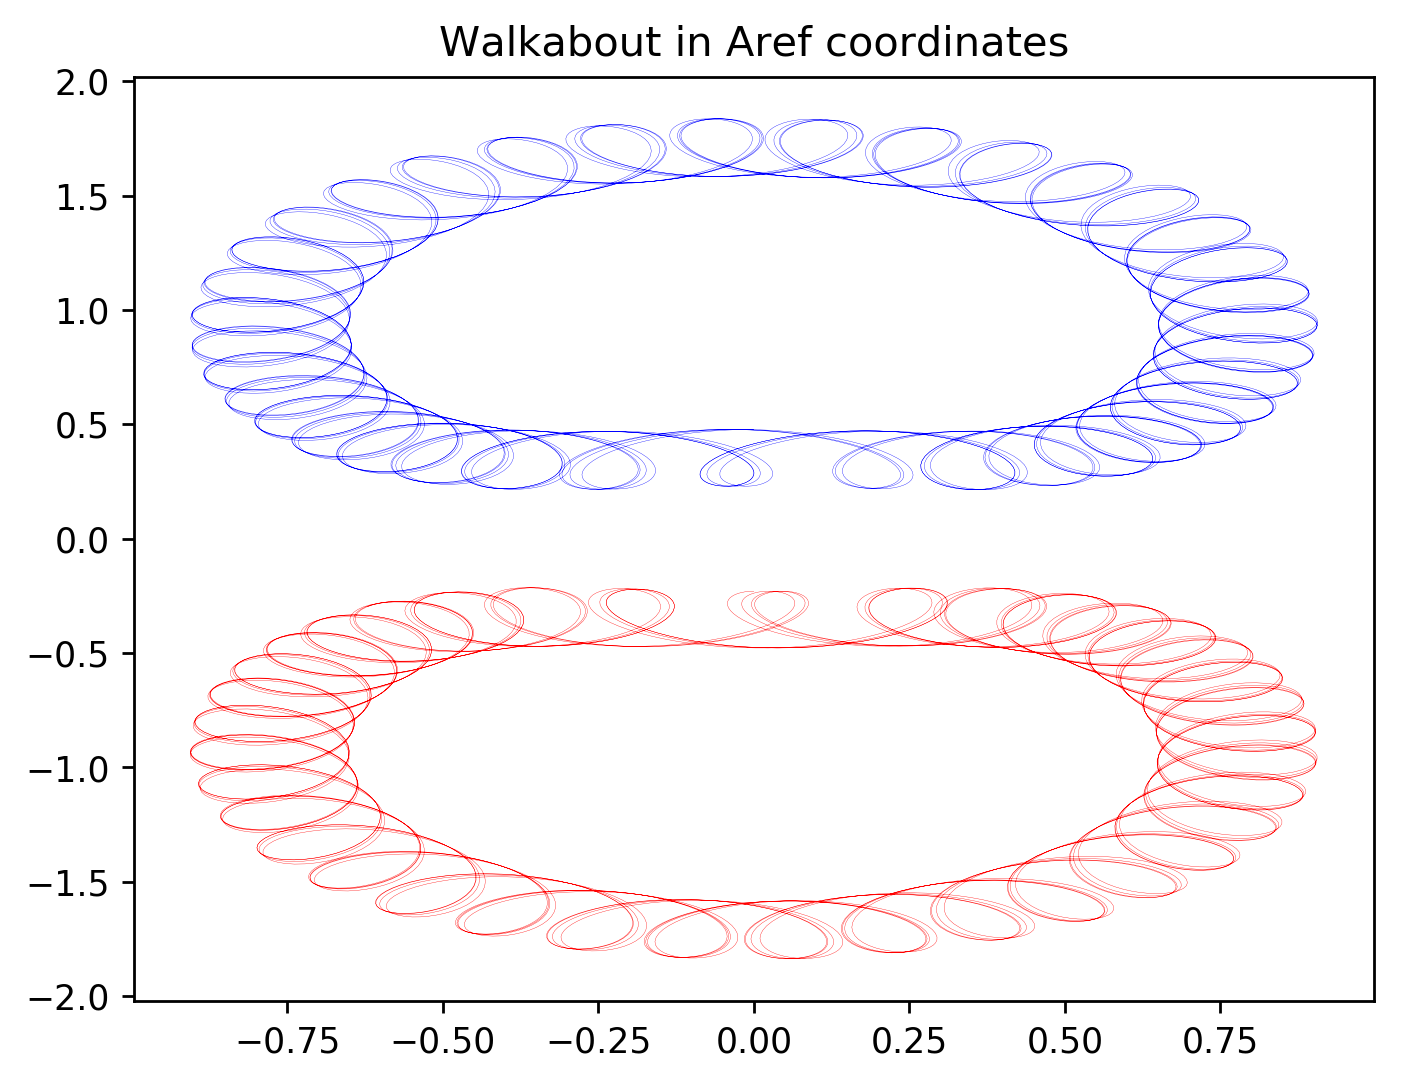

In [12]:
figure(dpi=250)
plot(Q1,P1,"b",linewidth=.1)
plot(Q2,P2,"r",linewidth=.1)
title("Walkabout in Aref coordinates");

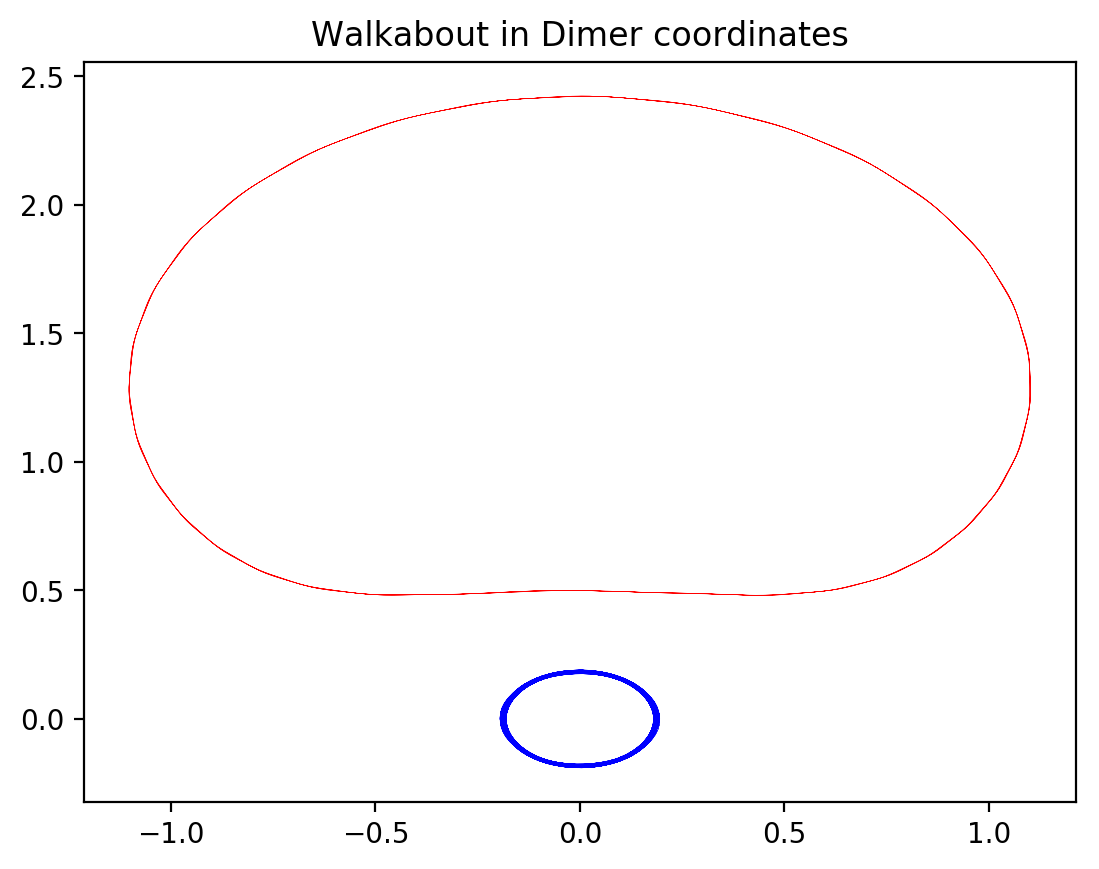

In [13]:
figure(dpi=200)
plot(q1,p1,"b",linewidth=.1)
plot(q2,p2,"r",linewidth=.1)
title("Walkabout in Dimer coordinates");

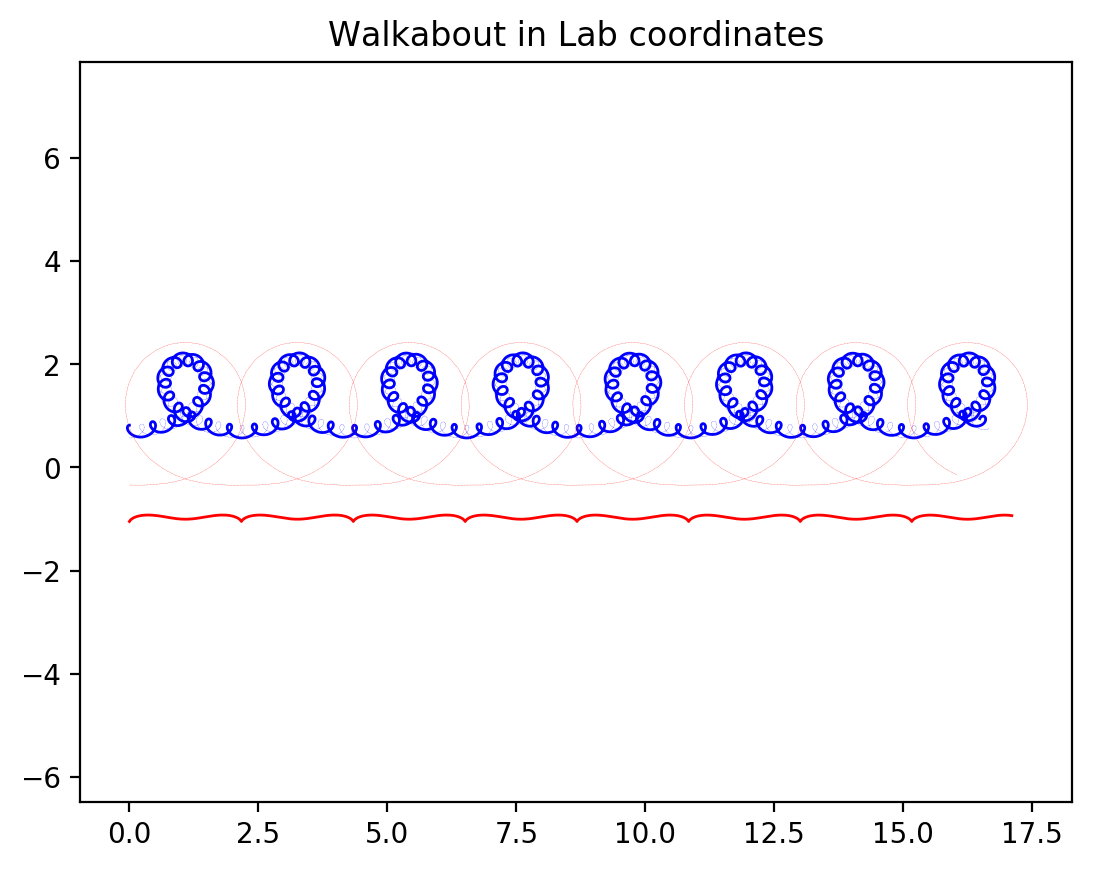

In [14]:
figure(dpi=200)
plot(z_1posX,z_1posY,c="b",linewidth=1)
plot(z_1negX,z_1negY,c="r",linewidth=1)
plot(z_2posX,z_2posY,c="b",linewidth=.1,linestyle="--")
plot(z_2negX,z_2negY,c="r",linewidth=.1,linestyle="--")
title("Walkabout in Lab coordinates");
axis("equal");

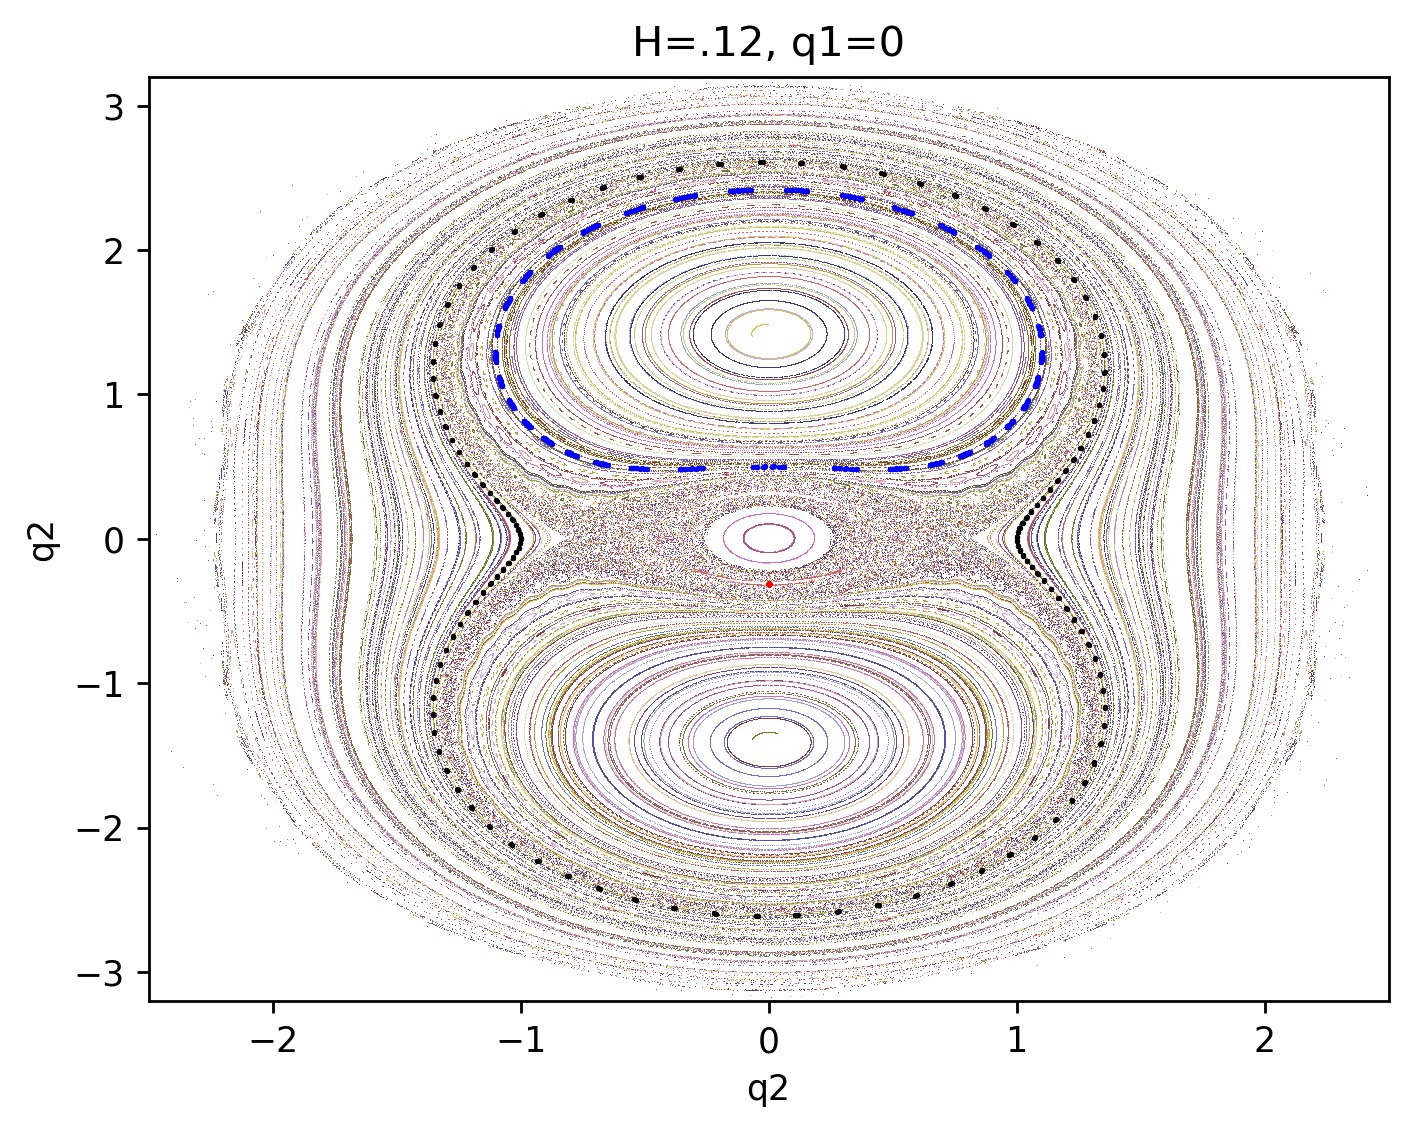

(-3.2, 3.2)

In [16]:
Brandons_Colors=["#393b79" ,"#5254a3","#6b6ecf","#9c9ede" ,"#637939","#8ca252" ,"#b5cf6b" ,"#cedb9c" ,"#8c6d31","#bd9e39" ,"#e7ba52","#e7cb94","#843c39","#ad494a" ,"#d6616b","#e7969c" ,"#7b4173" ,"#a55194","#ce6dbd" ,"#de9ed6"];
color_counter=0
figure(dpi=250)
for c in keys(SAVE_DATA)
    global color_counter
    color_counter+=1
    Q_PSS,P_PSS=SAVE_DATA[c]
    current_color=Brandons_Colors[mod(color_counter,length(Brandons_Colors))+1]
    plot(Q_PSS,P_PSS,",",c=current_color);
end
Q_PSS_braid,P_PSS_braid=PSS_function(q20_braid, p20_braid, H, 1e3);
Q_PSS_walk,P_PSS_walk=PSS_function(q20_walk, p20_walk, H, 1e3);
Q_PSS_leap,P_PSS_leap=PSS_function(q20_leap, p20_leap, H, 1e3);
plot(Q_PSS_braid,P_PSS_braid, ".",markersize=1,c="k");
plot(Q_PSS_walk,P_PSS_walk, ".",markersize=1,c="b");
plot(Q_PSS_leap,P_PSS_leap, ".",markersize=1,c="r");

xlabel("q2")
ylabel("q2")
title("H=.12, q1=0")
xlim(-2.5,2.5) 
ylim(-3.2,3.2) 
# show()